In [1]:
#modules
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import Dataset
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
import torchvision
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 
from sklearn.utils import shuffle
import pydicom
from pydicom.data import get_testdata_files
from pydicom import dcmread
import time
%matplotlib inline

C:\Users\jerry\anaconda3\envs\pytorch\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: [WinError 126] 找不到指定的模組。
  warn(f"Failed to load image Python extension: {e}")


In [237]:
#load dataset
if torch.cuda.is_available():  
    torch.cuda.empty_cache()
    device = "cuda:0" 
else:  
    device = "cpu" 
    
start = time.time()

path='LungCT'
filelist=os.listdir(path)
count=0

train_ct_scan=[]
train_label=[]

test_ct_scan=[]
test_label=[]

counta=0
countb=0
counte=0
countg=0

train_len_a=0
test_len_a=0

train_len_b=0
test_len_b=0

train_len_e=0
test_len_e=0

train_len_g=0
test_len_g=0


for file in filelist:
    if 'A' in file:
        if counta < 3:
            path2=path+'/'+file+'/'
            path2list=os.listdir(path2)
            for folder2 in path2list:
                path3=path2+folder2+'/'
                path3list=os.listdir(path3)
                for folder3 in path3list:
                    path4=path3+folder3+'/'
                    path4list=os.listdir(path4)
                    for img in path4list:
                        train_label.append(0)
                        train_len_a+=1
                        imgdata=path4+img
                        pict=pydicom.read_file(imgdata)
                        windows=get_windowing(pict)
                        img=window_image(pict.pixel_array[75:437,75:437],windows[0],windows[1],windows[2],windows[3])
                        train_ct_scan.append(img.reshape(1,362,362))
        elif counta < 5:
            path2=path+'/'+file+'/'
            path2list=os.listdir(path2)
            for folder2 in path2list:
                path3=path2+folder2+'/'
                path3list=os.listdir(path3)
                for folder3 in path3list:
                    path4=path3+folder3+'/'
                    path4list=os.listdir(path4)
                    for img in path4list:
                        test_len_a+=1
                        test_label.append(0)
                        imgdata=path4+img
                        pict=pydicom.read_file(imgdata)
                        windows=get_windowing(pict)
                        img=window_image(pict.pixel_array[75:437,75:437],windows[0],windows[1],windows[2],windows[3])
                        test_ct_scan.append(img.reshape(1,362,362))
        else:
            continue
        counta+=1
    elif 'B' in file:
        if countb < 3:
            path2=path+'/'+file+'/'
            path2list=os.listdir(path2)
            for folder2 in path2list:
                path3=path2+folder2+'/'
                path3list=os.listdir(path3)
                for folder3 in path3list:
                    path4=path3+folder3+'/'
                    path4list=os.listdir(path4)
                    for img in path4list:
                        train_len_b+=1
                        train_label.append(1)
                        imgdata=path4+img
                        pict=pydicom.read_file(imgdata)
                        windows=get_windowing(pict)
                        img=window_image(pict.pixel_array[75:437,75:437],windows[0],windows[1],windows[2],windows[3])
                        train_ct_scan.append(img.reshape(1,362,362))
        elif countb < 5:
            path2=path+'/'+file+'/'
            path2list=os.listdir(path2)
            for folder2 in path2list:
                path3=path2+folder2+'/'
                path3list=os.listdir(path3)
                for folder3 in path3list:
                    path4=path3+folder3+'/'
                    path4list=os.listdir(path4)
                    for img in path4list:
                        test_len_b+=1
                        test_label.append(1)
                        imgdata=path4+img
                        pict=pydicom.read_file(imgdata)
                        windows=get_windowing(pict)
                        img=window_image(pict.pixel_array[75:437,75:437],windows[0],windows[1],windows[2],windows[3])
                        test_ct_scan.append(img.reshape(1,362,362))
        else:
            continue
        countb+=1
    elif 'E' in file:
        if counte < 3:
            path2=path+'/'+file+'/'
            path2list=os.listdir(path2)
            for folder2 in path2list:
                path3=path2+folder2+'/'
                path3list=os.listdir(path3)
                for folder3 in path3list:
                    path4=path3+folder3+'/'
                    path4list=os.listdir(path4)
                    for img in path4list:
                        train_len_e+=1
                        train_label.append(2)
                        imgdata=path4+img
                        pict=pydicom.read_file(imgdata)
                        windows=get_windowing(pict)
                        img=window_image(pict.pixel_array[75:437,75:437],windows[0],windows[1],windows[2],windows[3])
                        train_ct_scan.append(img.reshape(1,362,362))
        elif counte < 5:
            path2=path+'/'+file+'/'
            path2list=os.listdir(path2)
            for folder2 in path2list:
                path3=path2+folder2+'/'
                path3list=os.listdir(path3)
                for folder3 in path3list:
                    path4=path3+folder3+'/'
                    path4list=os.listdir(path4)
                    for img in path4list:
                        test_len_e+=1
                        test_label.append(2)
                        imgdata=path4+img
                        pict=pydicom.read_file(imgdata)
                        windows=get_windowing(pict)
                        img=window_image(pict.pixel_array[75:437,75:437],windows[0],windows[1],windows[2],windows[3])
                        test_ct_scan.append(img.reshape(1,362,362))
        else:
            continue
        counte+=1
    elif 'G' in file:
        if countg < 3:
            path2=path+'/'+file+'/'
            path2list=os.listdir(path2)
            for folder2 in path2list:
                path3=path2+folder2+'/'
                path3list=os.listdir(path3)
                for folder3 in path3list:
                    path4=path3+folder3+'/'
                    path4list=os.listdir(path4)
                    for img in path4list:
                        train_len_g+=1
                        train_label.append(3)
                        imgdata=path4+img
                        pict=pydicom.read_file(imgdata)
                        windows=get_windowing(pict)
                        img=window_image(pict.pixel_array[75:437,75:437],windows[0],windows[1],windows[2],windows[3])
                        train_ct_scan.append(img.reshape(1,362,362))
        elif countg < 5:
            path2=path+'/'+file+'/'
            path2list=os.listdir(path2)
            for folder2 in path2list:
                path3=path2+folder2+'/'
                path3list=os.listdir(path3)
                for folder3 in path3list:
                    path4=path3+folder3+'/'
                    path4list=os.listdir(path4)
                    for img in path4list:
                        test_len_g+=1
                        test_label.append(3)
                        imgdata=path4+img
                        pict=pydicom.read_file(imgdata)
                        windows=get_windowing(pict)
                        img=window_image(pict.pixel_array[75:437,75:437],windows[0],windows[1],windows[2],windows[3])
                        test_ct_scan.append(img.reshape(1,362,362))
        else:
            continue
        countg+=1

print(len(train_ct_scan))
print(len(test_ct_scan))

print()
print(train_len_a)
print(test_len_a)
print()
print(train_len_b)
print(test_len_b)
print()
print(train_len_e)
print(test_len_e)
print()
print(train_len_g)
print(test_len_g)

end = time.time()
print(end - start)

train_ct_scan=np.array(train_ct_scan)
train_ct_scan=torch.from_numpy(train_ct_scan)
train_label=np.array(train_label)
train_label=torch.tensor(train_label,dtype=torch.long)
test_ct_scan=np.array(test_ct_scan)
test_ct_scan=torch.from_numpy(test_ct_scan)
test_label=np.array(test_label)
test_label=torch.tensor(test_label,dtype=torch.long)


1783
956

258
117

640
308

511
297

374
234
46.319812297821045


In [241]:
class imgs(Dataset):
    def __init__(self,data,target,transform=None):
        self.data=data
        self.target=target
        self.transform=transform
    def __len__(self):
        return len(self.target)
    def __getitem__(self, index):
        img = self.data[index]
        lbl = self.target[index]
        return img, lbl
    
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1=nn.Conv2d(1,3,7,3,1) #170
        self.bn1=nn.BatchNorm2d(3)
        self.relu1=nn.ReLU()
        self.pool=nn.MaxPool2d(2) #85
        self.fc1 = nn.Linear(60*60*3,4)
    def forward(self,x):
        x=self.conv1(x)
        x=self.bn1(x)
        x=self.relu1(x)
        x=self.pool(x)
        x=x.view(-1,60*60*3)
        x=self.fc1(x)
        return(x)


torch.manual_seed(192)

trainset=imgs(train_ct_scan,train_label)
testset=imgs(test_ct_scan,test_label)
trainload=DataLoader(trainset,8,shuffle=True)
testload=DataLoader(testset,8,shuffle=True)

model=Net().to(device)
optimizer = optim.Adadelta(model.parameters(), lr=0.001)
loss_function = nn.CrossEntropyLoss()
final_train_accuracy=0
final_test_accuracy=0
tg=[] #test labels
pd=[] #predict labels

max_accuracy=0


for epoch in range(50):
    start=time.time()
    tg=[]
    pd=[]
    train_accuracy=0.0
    test_accuracy=0.0
    model.train()
    for data,target in trainload:
        data,target=data.to(device),target.to(device)
        optimizer.zero_grad()
        output=model(data.float())
        loss=loss_function(output,target)
        loss.backward()
        optimizer.step()
        _,prediction=torch.max(output.data,1)
        train_accuracy+=int(torch.sum(prediction==target.data))
    train_accuracy=train_accuracy/len(train_label) 
    model.eval()
    for data,target in testload:
        data,target=data.to(device),target.to(device)
        output=model(data.float())
        _,prediction=torch.max(output.data,1)
        test_accuracy+=int(torch.sum(prediction==target.data))
        for k in prediction:
            pd.append(k.item())
        for l in target.data:
            tg.append(l.item())
    test_accuracy=test_accuracy/len(test_label)
    end=time.time()
    runtime=end-start
    if test_accuracy>max_accuracy:
        max_accuracy=test_accuracy
        max_matrix=confusion_matrix(tg,pd)
        torch.save(model,'net.pt')
    print('epoch '+str(epoch+1)+' train acurracy: '+str(train_accuracy)+' test accuracy: '+str(test_accuracy)+' run-time: '+str(runtime))
    final_train_accuracy=train_accuracy
    final_test_accuracy=test_accuracy
print()
print("Accuracy: ",max_accuracy)
print("Confusion matrix: ")
print(max_matrix)

epoch 1 train acurracy: 0.39708356702187325 test accuracy: 0.39644351464435146 run-time: 5.4369590282440186
epoch 2 train acurracy: 0.48625911385305665 test accuracy: 0.39435146443514646 run-time: 5.08384370803833
epoch 3 train acurracy: 0.5361749859786876 test accuracy: 0.40585774058577406 run-time: 5.170332670211792
epoch 4 train acurracy: 0.5765563656758272 test accuracy: 0.39748953974895396 run-time: 4.997723340988159
epoch 5 train acurracy: 0.6023555804823332 test accuracy: 0.39435146443514646 run-time: 5.01625919342041
epoch 6 train acurracy: 0.6371284352215367 test accuracy: 0.39539748953974896 run-time: 5.011924743652344
epoch 7 train acurracy: 0.6550757150869322 test accuracy: 0.39330543933054396 run-time: 5.021675109863281
epoch 8 train acurracy: 0.6825574873808189 test accuracy: 0.38702928870292885 run-time: 5.06522011756897
epoch 9 train acurracy: 0.7134043746494672 test accuracy: 0.399581589958159 run-time: 5.013857126235962
epoch 10 train acurracy: 0.7476163768928772 test

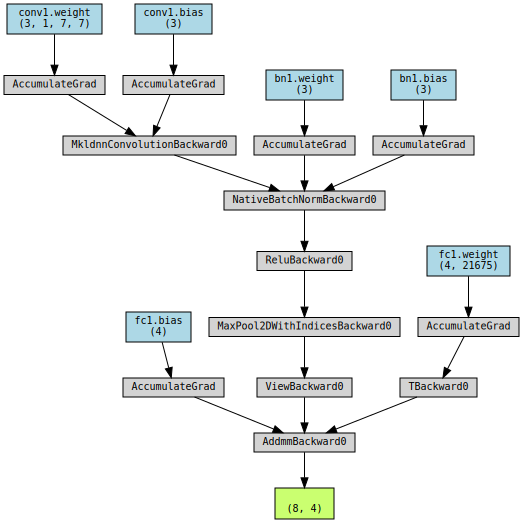

In [7]:
#model visualize
from torchviz import make_dot
batch = next(iter(trainload))
yhat = model(batch[0].float())
make_dot(yhat, params=dict(list(model.named_parameters())))

[[ 84  67  76 ...  79  79  77]
 [ 69  77  77 ...  74  65  76]
 [ 76  79  75 ...  75  72  75]
 ...
 [ 87  86  83 ...  87  75  73]
 [ 81  87  86 ... 105  84  89]
 [ 88  73  81 ...  72 108  95]]


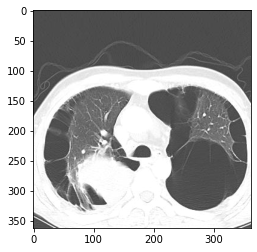

In [222]:
# Function to take care of translation and windowing. 
# source: https://www.kaggle.com/code/redwankarimsony/ct-scans-dicom-files-windowing-explained/notebook
from PIL import Image

def window_image(img, window_center,window_width, intercept, slope, rescale=True):
    img = (img*slope +intercept) #for translation adjustments given in the dicom file. 
    img_min = window_center - window_width/2 
    img_max = window_center + window_width/2 
    img[img<img_min] = img_min 
    img[img>img_max] = img_max 
    if rescale: 
        img = (img - img_min) / (img_max - img_min)*255.0 
    return img
    
def get_first_of_dicom_field_as_int(x):
    #get x[0] as in int is x is a 'pydicom.multival.MultiValue', otherwise get int(x)
    if type(x) == pydicom.multival.MultiValue: return int(x[0])
    else: return int(x)
    
def get_windowing(data):
    dicom_fields = [data[('0028','1050')].value, #window center
                    data[('0028','1051')].value, #window width
                    data[('0028','1052')].value, #intercept
                    data[('0028','1053')].value] #slope
    return [get_first_of_dicom_field_as_int(x) for x in dicom_fields]


img=matplotlib.image.imread('./Dataset/train/E/20.jpg')

img=img[75:437,75:437]

print(img)



plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()